# kaggle Housing Data

- [9.2.1 Dummy Variables](#9.2.2-Dummy-Variables)
- [9.2.2 Missing Values](#9.2.2-Missing-Values)
- [9.2.3 Ridge Regression](#9.2.3-Ridge-Regression)
- [9.2.4 Elastic Net](#9.2.4-Elastic.Net)


In [116]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import scale 
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

%precision 3

'%.3f'

In [4]:
df_train = pd.read_csv('../data/kaggle/HousePrices/train.csv', index_col='Id')
df_test = pd.read_csv('../data/kaggle/HousePrices/test.csv', index_col='Id')

df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
print(df_train.shape)
print(df_test.shape)
df_test.head()

(1460, 80)
(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


####  9.2.1 Dummy Variables

In [5]:
# convert int values to str for specific features
for categ in ['MSSubClass', 'OverallQual', 'OverallCond']:
    df_train[categ] = df_train[categ].astype(str)
    df_test[categ] = df_test[categ].astype(str)

In [6]:
#lots of categorical variables !

d = df_train.dtypes.groupby(df_train.dtypes).groups
category = d[np.dtype('O')].tolist() # + ['MSSubClass', 'OverallQual', 'OverallCond']
#category


####  9.2.2 Missing Values

In [38]:
# show features with count of NaN values
def ShowMissingValues(df):
    s = df.isnull().sum() + df.isna().sum()
    s = s.sort_values(ascending=False)
    s = s[s > 0]
    print(s)
    
ShowMissingValues(df_train)

PoolQC          2906
MiscFeature     2812
Alley           2738
Fence           2358
FireplaceQu     1380
LotFrontage      518
GarageType       162
GarageCond       162
GarageFinish     162
GarageQual       162
GarageYrBlt      162
BsmtFinType2      76
BsmtExposure      76
BsmtQual          74
BsmtCond          74
BsmtFinType1      74
MasVnrArea        16
MasVnrType        16
Electrical         2
dtype: int64


In [48]:
def FillMissingValues(df):

    for feature in ['GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'BsmtFullBath',
                    'BsmtFinSF1', 'GarageArea', 'BsmtFinSF2', 'TotalBsmtSF',
                    'BsmtUnfSF', 'BsmtHalfBath', 'GarageCars']:
        df[feature] = df[feature].fillna(df[feature].mean())
        #df_test[feature] = df_test[feature].fillna(df_test[feature].mean())

    for feature in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                    'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual',
                    'BsmtFinType2','BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                    'Electrical', 'MSZoning', 'Functional', 'Utilities', 'KitchenQual',
                    'SaleType', 'Exterior1st', 'Exterior2nd', 'MasVnrType'
                   ]:
        #df_train[feature] = 
        df[feature] = df[feature].fillna('None')
        #df_test[feature] = df_test[feature].fillna('NaN')

   # for feature in ['MasVnrType']:
   #     df_train[feature] = df_train[feature].fillna('None')
        #df_test[feature] = df_test[feature].fillna('None')
        
    return df


def RowsWithMissingValues(df):
    dfMissing = df.isnull() | df.isna()
    return df[dfMissing.any(axis=1)]


In [85]:
#whole_data.shape

(2919, 79)

In [84]:
whole_data = pd.concat([df_train.drop('SalePrice', axis=1), df_test], axis=0)

whole_data = FillMissingValues(whole_data)

# show features with count of NaN values
ShowMissingValues(whole_data)


Series([], dtype: int64)


In [50]:
#df_train[feature].mean()
whole_data["PoolQC"].unique()
#ShowMissingValues(whole_data["PoolQC"])

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [86]:
whole_dataNoDummies = whole_data.drop(category, axis=1)
whole_dataNoDummies.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,...,548.0,0,61,0,0,0,0,0,2,2008
2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,...,460.0,298,0,0,0,0,0,0,5,2007
3,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,...,608.0,0,42,0,0,0,0,0,9,2008
4,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,...,642.0,0,35,272,0,0,0,0,2,2006
5,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,...,836.0,192,84,0,0,0,0,0,12,2008


In [98]:
#scale the entire data set:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(whole_dataNoDummies))
print(scaler.mean_)
whole_dataNoDummies_scaled = scaler.transform(whole_dataNoDummies)

whole_dataNoDummies = pd.DataFrame(whole_dataNoDummies_scaled, columns=whole_dataNoDummies.columns, index=whole_data.index)
#whole_dataNoDummies.reindex(whole_data.index)
#whole_dataNoDummies= scale(whole_dataNoDummies)
whole_dataNoDummies

StandardScaler(copy=True, with_mean=True, with_std=True)
[ 9.737e-18  0.000e+00  2.799e-17 -7.303e-18  1.217e-18  1.947e-17
  1.217e-17  2.069e-17 -3.651e-18  9.128e-18 -2.191e-17 -2.191e-17
 -9.737e-18  1.278e-17  7.303e-18  9.737e-18 -2.556e-17  1.278e-17
 -5.355e-17 -1.704e-17  2.434e-18 -1.461e-17 -2.678e-17 -1.156e-17
 -2.312e-17 -1.826e-17  1.339e-17 -1.217e-17 -1.217e-17 -4.868e-18
  4.868e-18 -2.191e-17 -4.868e-18]


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,-2.020675e-01,-0.217879,1.046258,0.896833,0.525202,0.580907,-0.293130,-0.934863,-0.444328,-0.773861,...,0.348900,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646
2,5.018705e-01,-0.072044,0.154764,-0.395604,-0.572250,1.178112,-0.293130,-0.629896,0.477111,0.261075,...,-0.059792,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962
3,-6.127993e-02,0.137197,0.980221,0.848965,0.334828,0.097873,-0.293130,-0.288516,-0.299076,-0.610718,...,0.627553,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,0.157646
4,-4.367135e-01,-0.078385,-1.859351,-0.682812,-0.572250,-0.494941,-0.293130,-0.047275,-0.671283,-0.506205,...,0.785457,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,-1.363569
5,6.895873e-01,0.518903,0.947203,0.753229,1.387486,0.468931,-0.293130,-0.161068,0.211573,-0.037170,...,1.686437,0.776967,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,2.132012,0.157646
6,7.365165e-01,0.500515,0.716075,0.513889,-0.572250,0.637993,-0.293130,-1.130587,-0.580501,-0.926807,...,0.033092,-0.424567,-0.258819,-0.359601,12.603223,-0.285935,-0.06315,1.144312,1.395173,0.918253
7,2.672245e-01,-0.010667,1.079276,0.992569,0.469209,2.036595,-0.293130,-0.554793,1.439402,1.362287,...,0.757592,1.274972,0.140803,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,0.658334,-0.602962
8,-8.276277e-17,0.027123,0.055709,-0.539208,0.771569,0.916835,-0.103946,-0.784655,0.125330,-0.134036,...,0.051669,1.116875,2.316520,3.189963,-0.103331,-0.285935,-0.06315,0.527360,1.763592,0.918253
9,-8.590763e-01,-0.513352,-1.331059,-1.640173,-0.572250,-0.969192,-0.293130,0.890383,-0.226451,-0.350710,...,-0.022639,-0.029326,-0.702843,2.831893,-0.103331,-0.285935,-0.06315,-0.089592,-0.815344,0.157646


In [99]:
print(whole_data[category].shape)
whole_data_dummies =pd.get_dummies(whole_data[category])
print(whole_data_dummies.shape)
print(whole_dataNoDummies.shape)
RowsWithMissingValues(whole_dataNoDummies)
whole_data_dummies

(2919, 46)
(2919, 309)
(2919, 33)


,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0


In [102]:
whole_data_scaled = pd.concat([whole_dataNoDummies, pd.get_dummies(whole_data[category])], axis=1)

#whole_data_scaled = pd.get_dummies(whole_data_scaled)
#whole_data_scaled.head()

#RowsWithMissingValues(whole_data_scaled)

print(whole_data_scaled.shape)
whole_data_scaled.head()

(2919, 342)


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202068,-0.217879,1.046258,0.896833,0.525202,0.580907,-0.29313,-0.934863,-0.444328,-0.773861,...,0,0,0,1,0,0,0,0,1,0
2,0.501870,-0.072044,0.154764,-0.395604,-0.572250,1.178112,-0.29313,-0.629896,0.477111,0.261075,...,0,0,0,1,0,0,0,0,1,0
3,-0.061280,0.137197,0.980221,0.848965,0.334828,0.097873,-0.29313,-0.288516,-0.299076,-0.610718,...,0,0,0,1,0,0,0,0,1,0
4,-0.436714,-0.078385,-1.859351,-0.682812,-0.572250,-0.494941,-0.29313,-0.047275,-0.671283,-0.506205,...,0,0,0,1,1,0,0,0,0,0
5,0.689587,0.518903,0.947203,0.753229,1.387486,0.468931,-0.29313,-0.161068,0.211573,-0.037170,...,0,0,0,1,0,0,0,0,1,0


In [104]:
#split the data back into train and test!
print(df_train.shape) #1460
X_train = whole_data_scaled.iloc[0:1460,:]
print(X_train.shape)
#train.head()
print(df_test.shape) 
X_test  = whole_data_scaled.iloc[1460:,:]
print(X_test.shape)
#df_train.iloc[1455:1460,:]
y_train = np.log(df_train['SalePrice'].values)

(1460, 80)
(1460, 342)
(1459, 79)
(1459, 342)


In [106]:
#check for missing values:
np.isnan(y_train).sum()
np.isfinite(y_train).sum()
X_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.501870,0.184371,-0.340510,-1.113625,-0.572250,0.058352,0.558197,-0.661759,-0.385319,-0.671897,...,0,0,0,1,0,0,0,0,1,0
1462,0.548800,0.519791,-0.439565,-1.257229,0.032468,1.057354,-0.293130,-0.352241,0.629171,0.431865,...,0,0,0,1,0,0,0,0,1,0
1463,0.220295,0.464374,0.848148,0.657493,-0.572250,0.767534,-0.293130,-0.964449,-0.280920,-0.590326,...,0,0,0,1,0,0,0,0,1,0
1464,0.408012,-0.024109,0.881166,0.657493,-0.460265,0.352564,-0.293130,-0.538862,-0.285459,-0.595424,...,0,0,0,1,0,0,0,0,1,0
1465,-1.234510,-0.654748,0.683057,0.370284,-0.572250,-0.391747,-0.293130,1.038314,0.517963,0.306959,...,0,0,0,1,0,0,0,0,1,0



#### 9.2.3 Ridge Regression

Fit a model with the predictors of your choice and submit to kaggle!

In [107]:
n_folds=10
# Setup the hyperparameter grid
alpha_space = np.logspace(-3, 0.5, 25)
param_grid = {'alpha': alpha_space}

# Instantiate a Ridge regression object: ridge
ridge = Ridge(normalize=True)

# Instantiate the GridSearchCV object: logreg_cv
ridge_cv = GridSearchCV(ridge, param_grid, cv=n_folds)

# Fit it to the data
ridge_cv.fit(X_train, y_train)



GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 1.39905e-03, 1.95734e-03, 2.73842e-03, 3.83119e-03,
       5.36002e-03, 7.49894e-03, 1.04914e-02, 1.46780e-02, 2.05353e-02,
       2.87298e-02, 4.01945e-02, 5.62341e-02, 7.86744e-02, 1.10069e-01,
       1.53993e-01, 2.15443e-01, 3.01416e-01, 4.21697e-01, 5.89975e-01,
       8.25404e-01, 1.15478e+00, 1.61560e+00, 2.26030e+00, 3.16228e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

(0.001, 3.162)

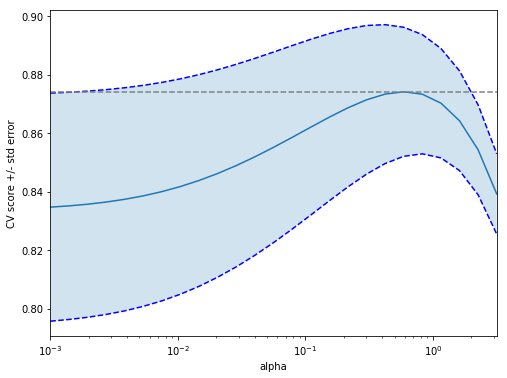

In [108]:
#plot:
scores = ridge_cv.cv_results_['mean_test_score']
scores_std = ridge_cv.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alpha_space, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alpha_space, scores + std_error, 'b--')
plt.semilogx(alpha_space, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alpha_space, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alpha_space[0], alpha_space[-1]])

In [109]:
print(ridge_cv.best_params_)
ridge2 = Ridge()
ridge2.set_params(alpha=ridge_cv.best_params_["alpha"])
ridge2.fit(X_train, y_train)



{'alpha': 0.5899746255923566}


Ridge(alpha=0.5899746255923566, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [111]:
y_pred = np.exp(ridge2.predict(X_test))

In [112]:
# create submission with current model

pred_df = pd.DataFrame(y_pred, index=df_test.index, columns=["SalePrice"])
pred_df.to_csv('../data/kaggle/HousePrices/submissions/ridge1.csv', header=True, index_label='Id')

* Take Log of SalePrice
* add dummies back
* use ridge or lasso or enet to find the best CV predictions!
* think of interaction terms

In [114]:
RowsWithMissingValues(pred_df)

,SalePrice
Id,


#### 9.2.4 Elastic Net

In [118]:
# find optimal ElasticNet model
l1_list = np.logspace(-2, 0, 10)
clf = ElasticNetCV(alphas=alpha_space, l1_ratio=l1_list,
                   cv=n_folds, random_state=1, max_iter=1000)
clf.fit(X_train, y_train)

ElasticNetCV(alphas=array([1.00000e-03, 1.39905e-03, 1.95734e-03, 2.73842e-03, 3.83119e-03,
       5.36002e-03, 7.49894e-03, 1.04914e-02, 1.46780e-02, 2.05353e-02,
       2.87298e-02, 4.01945e-02, 5.62341e-02, 7.86744e-02, 1.10069e-01,
       1.53993e-01, 2.15443e-01, 3.01416e-01, 4.21697e-01, 5.89975e-01,
       8.25404e-01, 1.15478e+00, 1.61560e+00, 2.26030e+00, 3.16228e+00]),
       copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=array([0.01   , 0.01668, 0.02783, 0.04642, 0.07743, 0.12915, 0.21544,
       0.35938, 0.59948, 1.     ]),
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=1,
       selection='cyclic', tol=0.0001, verbose=0)

In [120]:
en = ElasticNet(alpha=clf.alpha_, l1_ratio=clf.l1_ratio_, max_iter=1000)
enFinal = en.fit(X_train, y_train)

y_pred = enFinal.predict(X_test)

In [121]:
pred_df = pd.DataFrame(np.exp(y_pred), index=df_test.index, columns=["SalePrice"])
pred_df.to_csv('../data/kaggle/HousePrices/submissions/en1.csv', header=True, index_label='Id')